# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import os 

# loading the dataset and printing few columns

In [3]:
# Loading the dataset
file_path = 'gym_members_exercise_tracking.csv'
df = pd.read_csv(file_path)

# Inspecting and printing the dataset
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
#description of dataset
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [5]:
#Checking for the null values 
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

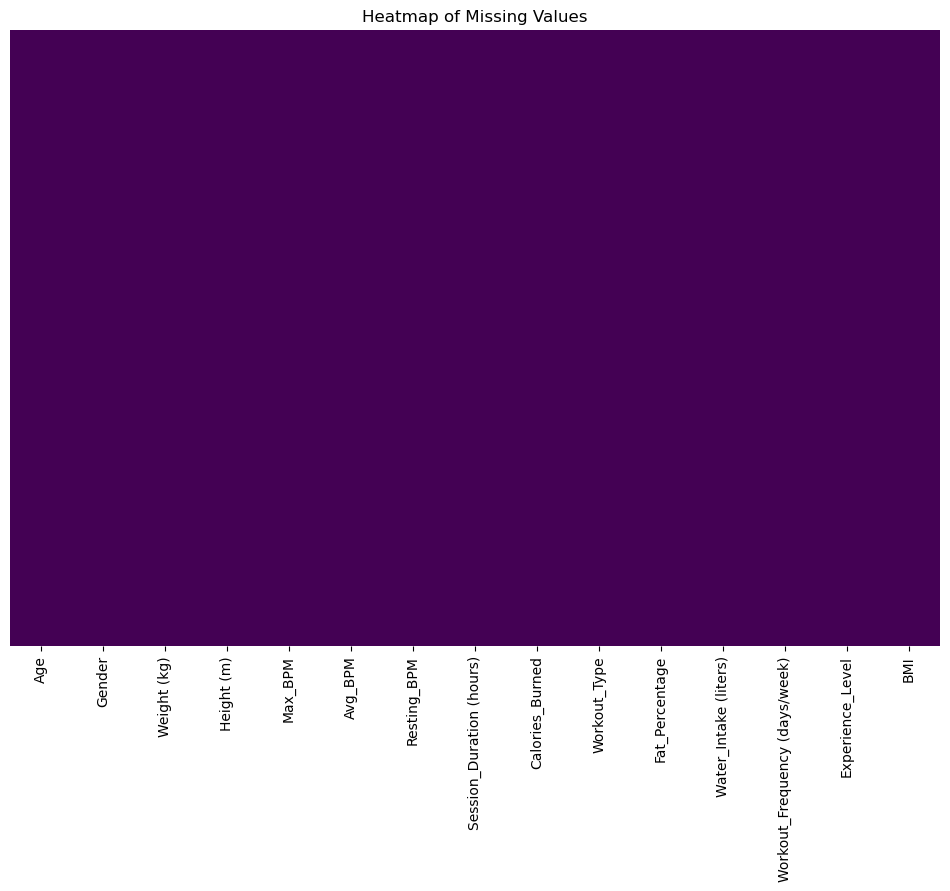

In [6]:
# Creating a heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

# Relational Graph

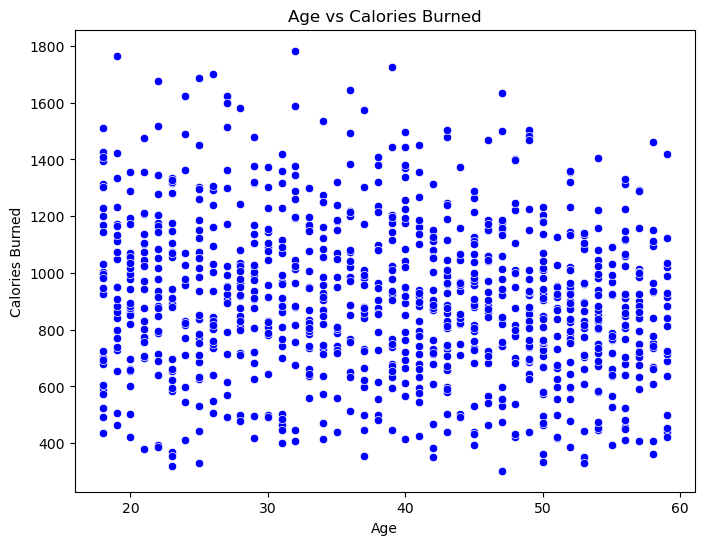

In [7]:
def scatter_plot():
    """
    Creates a scatter plot to visualize the relationship between Age and Calories Burned.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Age', y='Calories_Burned', color='blue')
    plt.title('Age vs Calories Burned')
    plt.xlabel('Age')
    plt.ylabel('Calories Burned')
    plt.show()

# Calling the function
scatter_plot()


# Categorical Graph

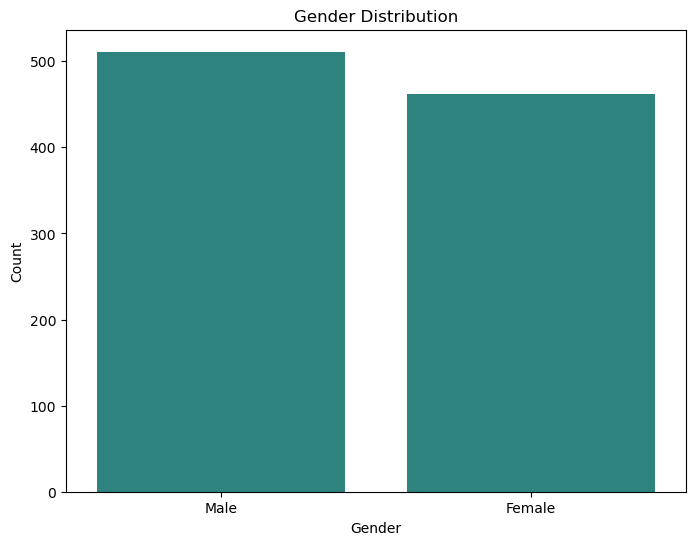

In [8]:
def bar_plot():
    """
    Creates a bar plot to show the distribution of Gender.
    """
    gender_count = df['Gender'].value_counts()
    color = plt.cm.viridis(0.5)  
    plt.figure(figsize=(8, 6))
    sns.barplot(x=gender_count.index, y=gender_count.values, color=color)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

# Calling the function
bar_plot()

# Satistical Graph

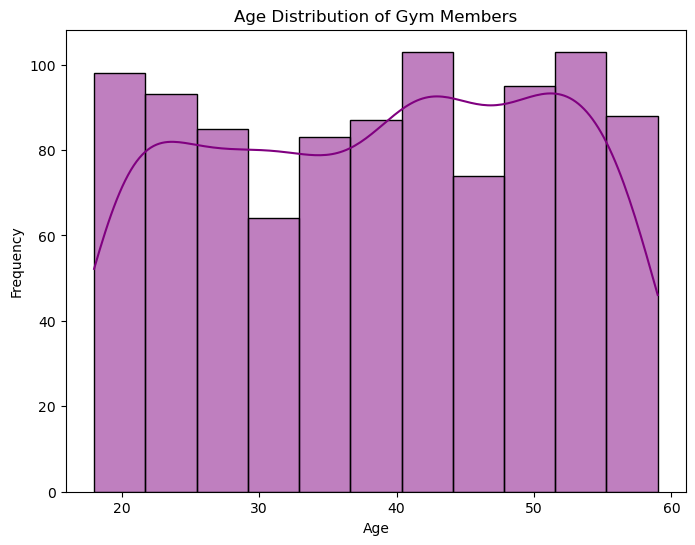

In [40]:
def histogram():
    """
    Creates a histogram to visualize the distribution of Age with KDE.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Age'], kde=True, color='purple')
    plt.title('Age Distribution of Gym Members')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Calling the function
histogram()


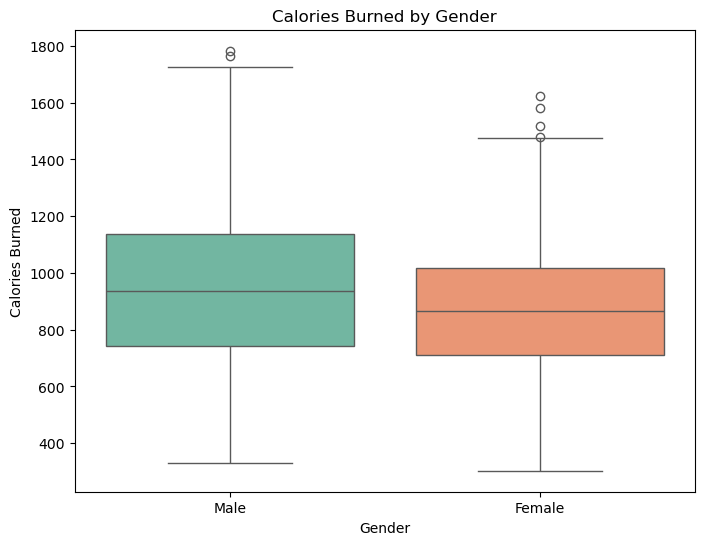

In [13]:
def box_plot():
    """
    Creates a box plot to show the distribution of Calories Burned by Gender.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Gender', y='Calories_Burned', hue='Gender', palette='Set2', legend=False)
    plt.title('Calories Burned by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Calories Burned')
    plt.show()

# Calling the function
box_plot()


# Analysis of the Dataset

In [12]:
def statistical_analysis_dataset():
    """
    Displays basic statistical analysis for key features: mean, median, std, skewness, and kurtosis.
    """
    print("Descriptive Statistics:\n", df.describe())
    print("\nSkewness for key columns:\n", df[['Age', 'Calories_Burned', 'Weight (kg)', 'BMI']].skew())
    print("\nKurtosis for key columns:\n", df[['Age', 'Calories_Burned', 'Weight (kg)', 'BMI']].kurt())

# Calling the function
statistical_analysis_dataset()


Descriptive Statistics:
               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000  

# K-means Clustering and Fitting 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

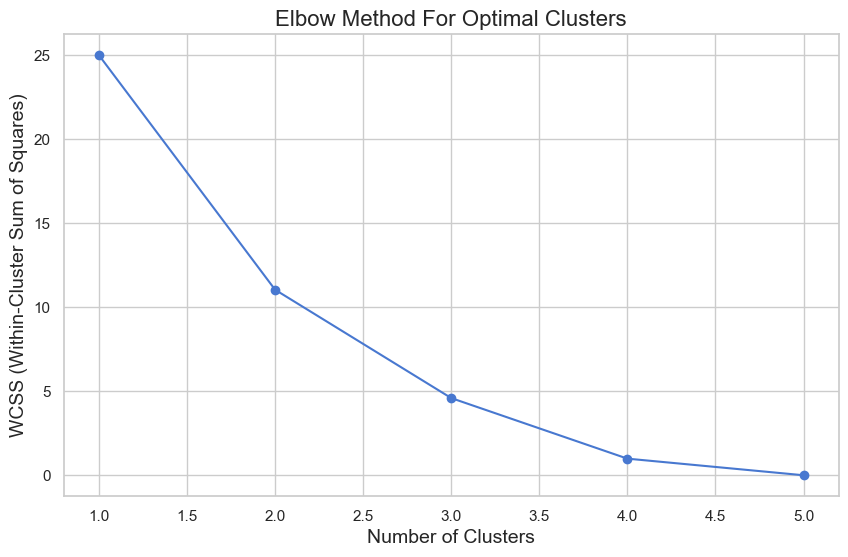

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\AppData\Local\Temp\ipykernel_3184\1870667711.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap for multiple clusters


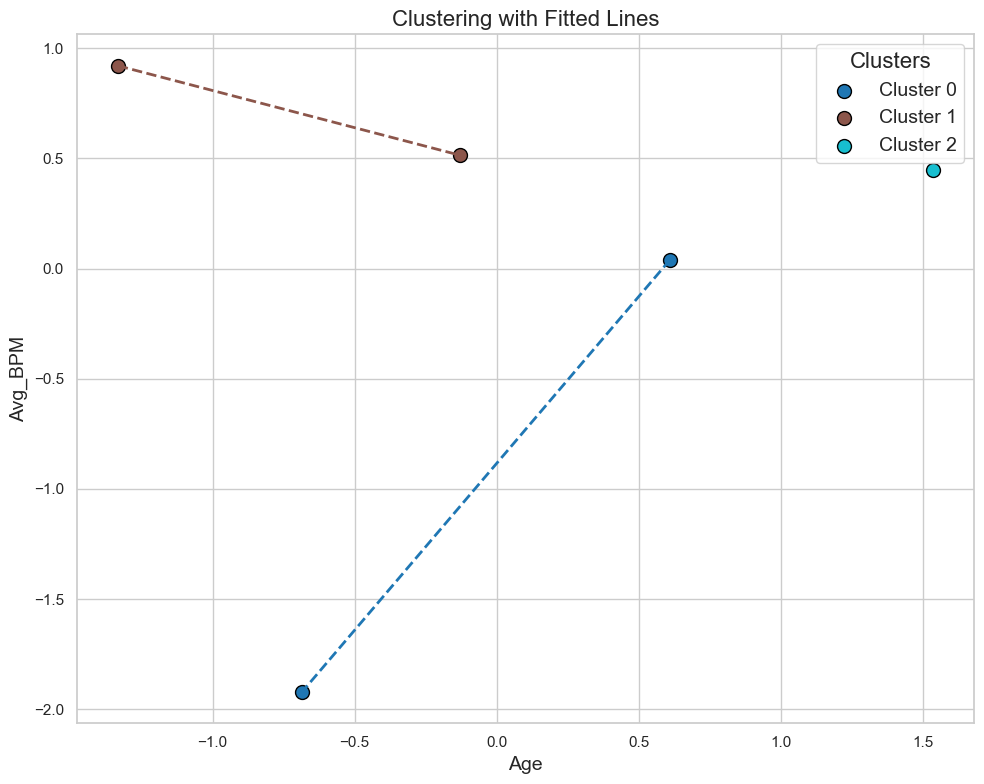

C:\Users\PMLS\AppData\Local\Temp\ipykernel_3184\1870667711.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap for multiple clusters


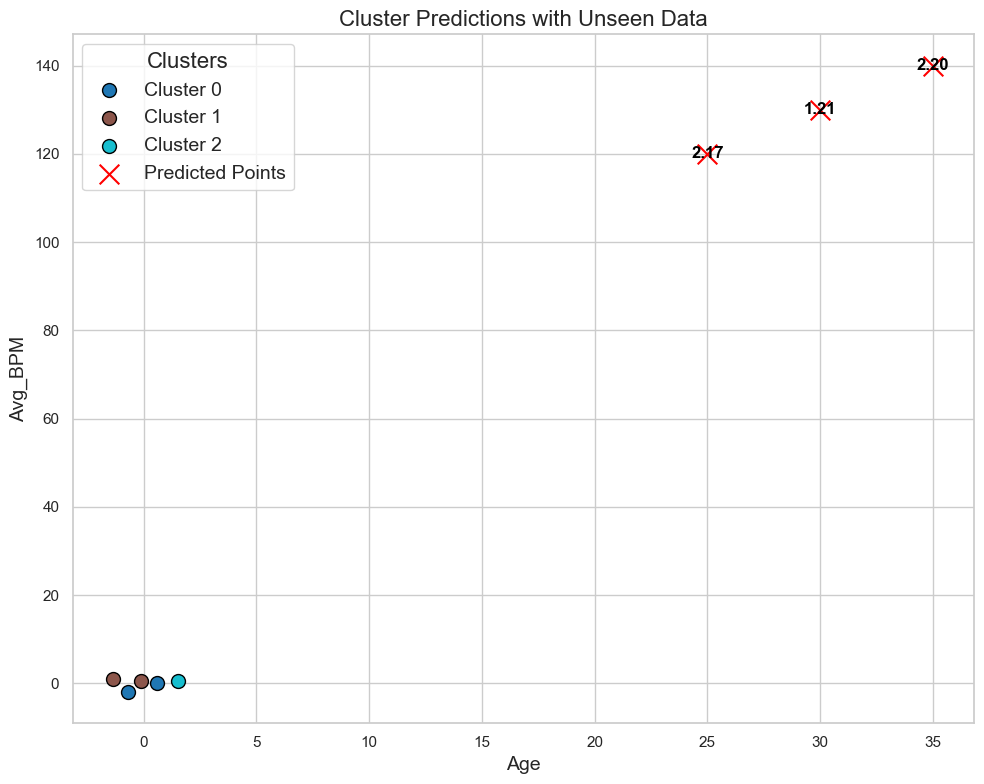

In [68]:
# Preprocessing the data by selecting only numeric columns and standardizing them
def preprocess_data(df, columns_to_use=None):
    """
    Preprocess the data by selecting only numeric columns and standardizing them.
    """
    numeric_df = df[columns_to_use] if columns_to_use is not None else df.select_dtypes(include=['float64', 'int64'])
    scaler = StandardScaler()
    numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
    return numeric_df_scaled

# Applying the Elbow Method to find the optimal number of clusters
def elbow_method(numeric_df, max_clusters=10):
    """
    Determines the optimal number of clusters using the Elbow Method.
    """
    # Ensuring that max_clusters doesn't exceed the number of samples
    max_clusters = min(max_clusters, numeric_df.shape[0])

    wcss = []
    
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(numeric_df)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='b')
    plt.title('Elbow Method For Optimal Clusters', fontsize=16)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
    plt.grid(True)
    plt.show()

# Performing KMeans clustering and assign cluster labels
def kmeans_clustering(numeric_df, num_clusters):
    """
    Applies KMeans clustering and assigns the cluster labels.
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    numeric_df['Cluster'] = kmeans.fit_predict(numeric_df)
    return numeric_df, kmeans

# Visualizing the clusters with linear regression lines fitted
def plot_clusters_with_lines(numeric_df, num_clusters):
    """
    Visualizes the clusters in the dataset using the first two features and fits a line for each cluster.
    """
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap for multiple clusters
    
    for cluster in range(num_clusters):
        cluster_data = numeric_df[numeric_df["Cluster"] == cluster]
        plt.scatter(
            cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
            label=f"Cluster {cluster}", color=colors(cluster), s=100, edgecolors='black'
        )
        
        # Fitting a linear regression line to the cluster
        X = cluster_data.iloc[:, 0].values.reshape(-1, 1)  # First feature
        y = cluster_data.iloc[:, 1].values  # Second feature
        lin_reg = LinearRegression()
        lin_reg.fit(X, y)
        
        # Predicting the values of y using the model
        y_pred = lin_reg.predict(X)
        
        # Plotting the fitted line
        plt.plot(X, y_pred, color=colors(cluster), linestyle='--', linewidth=2)

    plt.title("Clustering with Fitted Lines", fontsize=16)
    plt.xlabel(numeric_df.columns[0], fontsize=14)
    plt.ylabel(numeric_df.columns[1], fontsize=14)
    plt.legend(fontsize=14, title="Clusters", title_fontsize='16')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visualizing the predicted cluster points for unseen data
def plot_predictions(numeric_df, new_data, predicted_clusters, uncertainties, num_clusters):
    """
    Visualizes the predictions for unseen data with appropriate cluster labels and colors.
    """
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap for multiple clusters
    
    for cluster in range(num_clusters):
        cluster_data = numeric_df[numeric_df["Cluster"] == cluster]
        plt.scatter(
            cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], 
            label=f"Cluster {cluster}", color=colors(cluster), s=100, edgecolors='black'
        )
    
    # Plotting the new predicted data points (assumed unseen data)
    plt.scatter(new_data.iloc[:, 0], new_data.iloc[:, 1], color='red', marker='x', s=200, label='Predicted Points')
    
    # Annotating uncertainties for predicted points
    for i, uncertainty in enumerate(uncertainties):
        plt.text(
            new_data.iloc[i, 0], new_data.iloc[i, 1], f"{uncertainty:.2f}", 
            fontsize=12, ha='center', va='center', color='black', fontweight='bold'
        )
    
    plt.title("Cluster Predictions with Unseen Data", fontsize=16)
    plt.xlabel(numeric_df.columns[0], fontsize=14)
    plt.ylabel(numeric_df.columns[1], fontsize=14)
    plt.legend(fontsize=14, title="Clusters", title_fontsize='16')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main function to run the clustering analysis pipeline with line fitting
def run_clustering_analysis(df, new_data=None):
    """
    Runs the entire clustering analysis pipeline.
    """
   
    numeric_columns = ['Age', 'Avg_BPM', 'BMI', 'Calories_Burned', 'Experience_Level']  # Example numeric columns
    
    # Step 2: Preprocess the data
    numeric_df = preprocess_data(df, columns_to_use=numeric_columns)

    # Step 3: Applying Elbow Method to determine optimal number of clusters
    elbow_method(numeric_df, max_clusters=10)

    # Step 4: Set the number of clusters based on the Elbow Method (e.g., 3 clusters as an example)
    num_clusters = 3

    # Step 5: Applying KMeans clustering
    numeric_df, kmeans_model = kmeans_clustering(numeric_df, num_clusters)

    # Step 6: Visualizing the clusters with linear regression lines fitted
    plot_clusters_with_lines(numeric_df, num_clusters)

    # Step 7: Making predictions for unseen data
    if new_data is not None:
        # Preprocess the new data (ensure it has the same columns as the original numeric data)
        new_data_scaled = preprocess_data(new_data, columns_to_use=numeric_columns)
        
        # Predict the cluster labels for new data
        predicted_clusters = kmeans_model.predict(new_data_scaled)

        # Calculate uncertainty (distance to centroid)
        centroids = kmeans_model.cluster_centers_
        uncertainties = []
        
        for i in range(new_data_scaled.shape[0]):
            point = new_data_scaled.iloc[i, :].values
            cluster_idx = predicted_clusters[i]
            centroid = centroids[cluster_idx]
            uncertainty = np.linalg.norm(point - centroid)  # Euclidean distance
            uncertainties.append(uncertainty)

        # Visualizing the predictions on the clusters with uncertainties
        plot_predictions(numeric_df, new_data, predicted_clusters, uncertainties, num_clusters)

# Example new data for prediction (replace with actual new data values)
new_data = pd.DataFrame({
    'Age': [25, 30, 35],  # Example values for Age
    'Avg_BPM': [120, 130, 140],  # Example values for Avg_BPM
    'BMI': [22.0, 23.5, 21.5],  # Example values for BMI
    'Calories_Burned': [300, 350, 400],  # Example values for Calories_Burned
    'Experience_Level': [2, 3, 4],  # Example values for Experience Level
})

# Run the clustering analysis with the existing df and new data for prediction
run_clustering_analysis(df, new_data)


# Linear Regression 

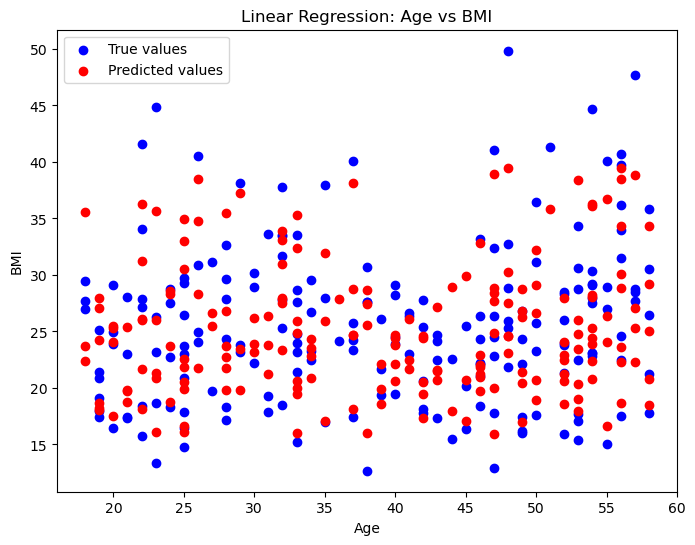

Mean Squared Error: 12.481118134956631
R2 Score: 0.7438798784522029


In [29]:
def linear_regression():
    """
    Fits a linear regression model to predict BMI based on Age and Weight.
    """
    # Selecting features and target variable
    X = df[['Age', 'Weight (kg)']]
    y = df['BMI']
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Creating and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['Age'], y_test, color='blue', label='True values')
    plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted values')
    plt.title('Linear Regression: Age vs BMI')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()

    # Evaluating the model
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')

# Calling the function
linear_regression()


# Confusion Matrix (s)

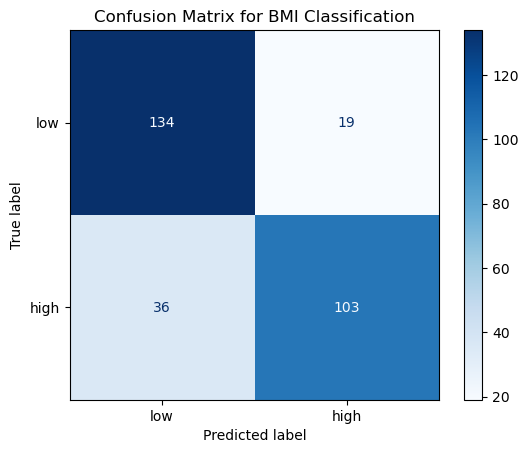

Confusion Matrix:
 [[134  19]
 [ 36 103]]


In [34]:
# Creating a BMI category: if 'high' if BMI > 25, or 'low' if BMI <= 25
df['BMI_category'] = np.where(df['BMI'] > 25, 'high', 'low')

X = df[['Age', 'Weight (kg)']]  
y = df['BMI_category']  # these are Target variables

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictting the target on the test data
y_pred = clf.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'high'])

# Displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'high'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for BMI Classification')
plt.show()

# Printing the confusion matrix
print("Confusion Matrix:\n", cm)


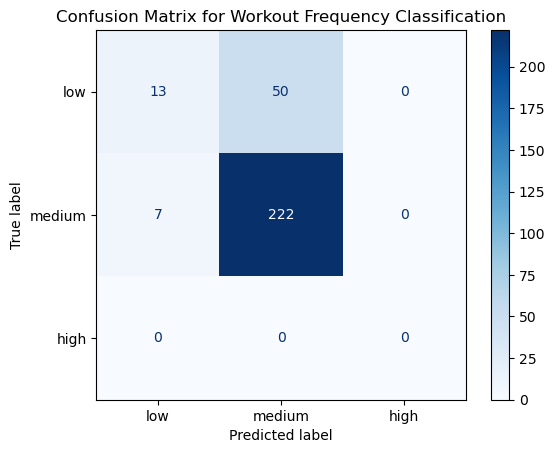

Confusion Matrix:
 [[ 13  50   0]
 [  7 222   0]
 [  0   0   0]]


In [36]:
# Classifying Workout_Frequency into 'low', 'medium', and 'high'
df['Workout_Frequency_category'] = pd.cut(df['Workout_Frequency (days/week)'], bins=[0, 2, 5, 7], labels=['low', 'medium', 'high'])

X = df[['Age', 'BMI', 'Calories_Burned']]  # Features
y = df['Workout_Frequency_category']  # Target variable

# Converting the target variable to a numeric label (low: 0, medium: 1, high: 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Training a logistic regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predicting the target on the test data
y_pred = clf.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Workout Frequency Classification')
plt.show()

# Printing the confusion matrix
print("Confusion Matrix:\n", cm)
